In [1]:
import os

os.chdir(r'E:\PGP-DSBA\Finance & Risk Analytics\project')
os.getcwd()

'E:\\PGP-DSBA\\Finance & Risk Analytics\\project'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
company_data = pd.read_csv('Company(FRA).csv')

In [4]:
company_data.head()

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
0,1,395.3,827.6,336.5,534.1,13.5,508.7,38.9,124.4,64.6,...,5.65,3.99,3.37,14.87,8760056.0,10.0,4.44,4.44,827.6,NaN
1,2,36.2,67.7,24.3,137.9,-3.7,131.0,3.2,5.5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.7,NaN
2,3,84.0,238.4,78.9,331.2,-18.1,309.2,3.9,25.8,10.5,...,2.51,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.4,NaN
3,4,2041.4,6883.5,1443.3,8448.5,212.2,8482.4,178.3,418.4,185.1,...,1.91,18.14,18.62,11.11,10000000.0,10.0,17.60,17.60,6883.5,NaN
4,5,41.8,90.9,47.0,388.6,3.4,392.7,-0.7,7.2,-0.6,...,68.00,45.87,28.67,19.93,107315.0,100.0,-6.52,-6.52,90.9,NaN


In [5]:
company_data.shape

(4256, 51)

In [6]:
# Adding default column to the dataset

company_data['default'] = np.where(company_data['Networth Next Year'] > 0, 0, 1)
company_data.head()

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE,default
0,1,395.3,827.6,336.5,534.1,13.5,508.7,38.9,124.4,64.6,...,3.99,3.37,14.87,8760056.0,10.0,4.44,4.44,827.6,NaN,0
1,2,36.2,67.7,24.3,137.9,-3.7,131.0,3.2,5.5,1.0,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.7,NaN,0
2,3,84.0,238.4,78.9,331.2,-18.1,309.2,3.9,25.8,10.5,...,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.4,NaN,0
3,4,2041.4,6883.5,1443.3,8448.5,212.2,8482.4,178.3,418.4,185.1,...,18.14,18.62,11.11,10000000.0,10.0,17.60,17.60,6883.5,NaN,0
4,5,41.8,90.9,47.0,388.6,3.4,392.7,-0.7,7.2,-0.6,...,45.87,28.67,19.93,107315.0,100.0,-6.52,-6.52,90.9,NaN,0


In [7]:
company_data['default'].value_counts()

0    3352
1     904
Name: default, dtype: int64

In [8]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 52 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Num                                          4256 non-null   int64  
 1   Networth Next Year                           4256 non-null   float64
 2   Total assets                                 4256 non-null   float64
 3   Net worth                                    4256 non-null   float64
 4   Total income                                 4025 non-null   float64
 5   Change in stock                              3706 non-null   float64
 6   Total expenses                               4091 non-null   float64
 7   Profit after tax                             4102 non-null   float64
 8   PBDITA                                       4102 non-null   float64
 9   PBT                                          4102 non-null   float64
 10  

In [9]:
company_data.isnull().sum()

Num                                               0
Networth Next Year                                0
Total assets                                      0
Net worth                                         0
Total income                                    231
Change in stock                                 550
Total expenses                                  165
Profit after tax                                154
PBDITA                                          154
PBT                                             154
Cash profit                                     154
PBDITA as % of total income                      79
PBT as % of total income                         79
PAT as % of total income                         79
Cash profit as % of total income                 79
PAT as % of net worth                             0
Sales                                           305
Income from fincial services                   1111
Other income                                   1556
Total capita

In [10]:
float_column_names = company_data.select_dtypes(float).columns
company_data[float_column_names] = company_data[float_column_names].apply((lambda x: x.fillna(x.median())))

In [11]:
company_data.isnull().sum()

Num                                            0
Networth Next Year                             0
Total assets                                   0
Net worth                                      0
Total income                                   0
Change in stock                                0
Total expenses                                 0
Profit after tax                               0
PBDITA                                         0
PBT                                            0
Cash profit                                    0
PBDITA as % of total income                    0
PBT as % of total income                       0
PAT as % of total income                       0
Cash profit as % of total income               0
PAT as % of net worth                          0
Sales                                          0
Income from fincial services                   0
Other income                                   0
Total capital                                  0
Reserves and funds  

In [12]:
company_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Num,4256.0,2.128500e+03,1.228746e+03,1.000000e+00,1.064750e+03,2128.500,3.192250e+03,4.256000e+03
Networth Next Year,4256.0,1.344741e+03,1.593674e+04,-7.426560e+04,3.975000e+00,72.100,3.308250e+02,8.057734e+05
Total assets,4256.0,3.573617e+03,3.007444e+04,1.000000e-01,9.130000e+01,315.500,1.120800e+03,1.176509e+06
Net worth,4256.0,1.351950e+03,1.296131e+04,0.000000e+00,3.147500e+01,104.800,3.898500e+02,6.131516e+05
Total income,4256.0,4.458433e+03,5.244369e+04,0.000000e+00,1.212000e+02,455.100,1.387900e+03,2.442828e+06
Change in stock,4256.0,3.826161e+01,4.079452e+02,-3.029400e+03,-7.000000e-01,1.600,1.362500e+01,1.418550e+04
Total expenses,4256.0,4.203959e+03,5.039739e+04,-1.000000e-01,1.051250e+02,426.800,1.326400e+03,2.366035e+06
Profit after tax,4256.0,2.847001e+02,3.024125e+03,-3.908300e+03,6.000000e-01,9.000,5.045000e+01,1.194391e+05
PBDITA,4256.0,5.853504e+02,5.544132e+03,-4.407000e+02,7.300000e+00,36.900,1.461000e+02,2.085765e+05
PBT,4256.0,3.958701e+02,4.141058e+03,-3.894800e+03,1.000000e+00,12.600,7.002500e+01,1.452926e+05


In [13]:
X = company_data.drop('default', axis = 1)
y = company_data.pop('default')

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

best_features = SelectKBest(score_func= f_classif, k= 10)
fit = best_features.fit(X,y)

In [15]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [16]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score'] 

In [17]:
featureScores

,Feature,Score
0,Num,0.149988
1,Networth Next Year,9.647094
2,Total assets,0.011739
3,Net worth,0.000207
4,Total income,0.045125
5,Change in stock,0.000010
6,Total expenses,0.048061
7,Profit after tax,0.004675
8,PBDITA,0.000034
9,PBT,0.001265


In [18]:
print(featureScores.nlargest(10,'Score'))

                                        Feature      Score
37                 Debt to equity ratio (times)  66.498881
27                                      TOL/TNW  52.475842
15                        PAT as % of net worth  40.295946
28  Total term liabilities / tangible net worth  34.813222
29       Contingent liabilities / Net worth (%)  27.461237
13                     PAT as % of total income  13.913481
12                     PBT as % of total income  13.018678
14             Cash profit as % of total income  12.986537
1                            Networth Next Year   9.647094
39        Cash to average cost of sales per day   8.451568


<AxesSubplot:>

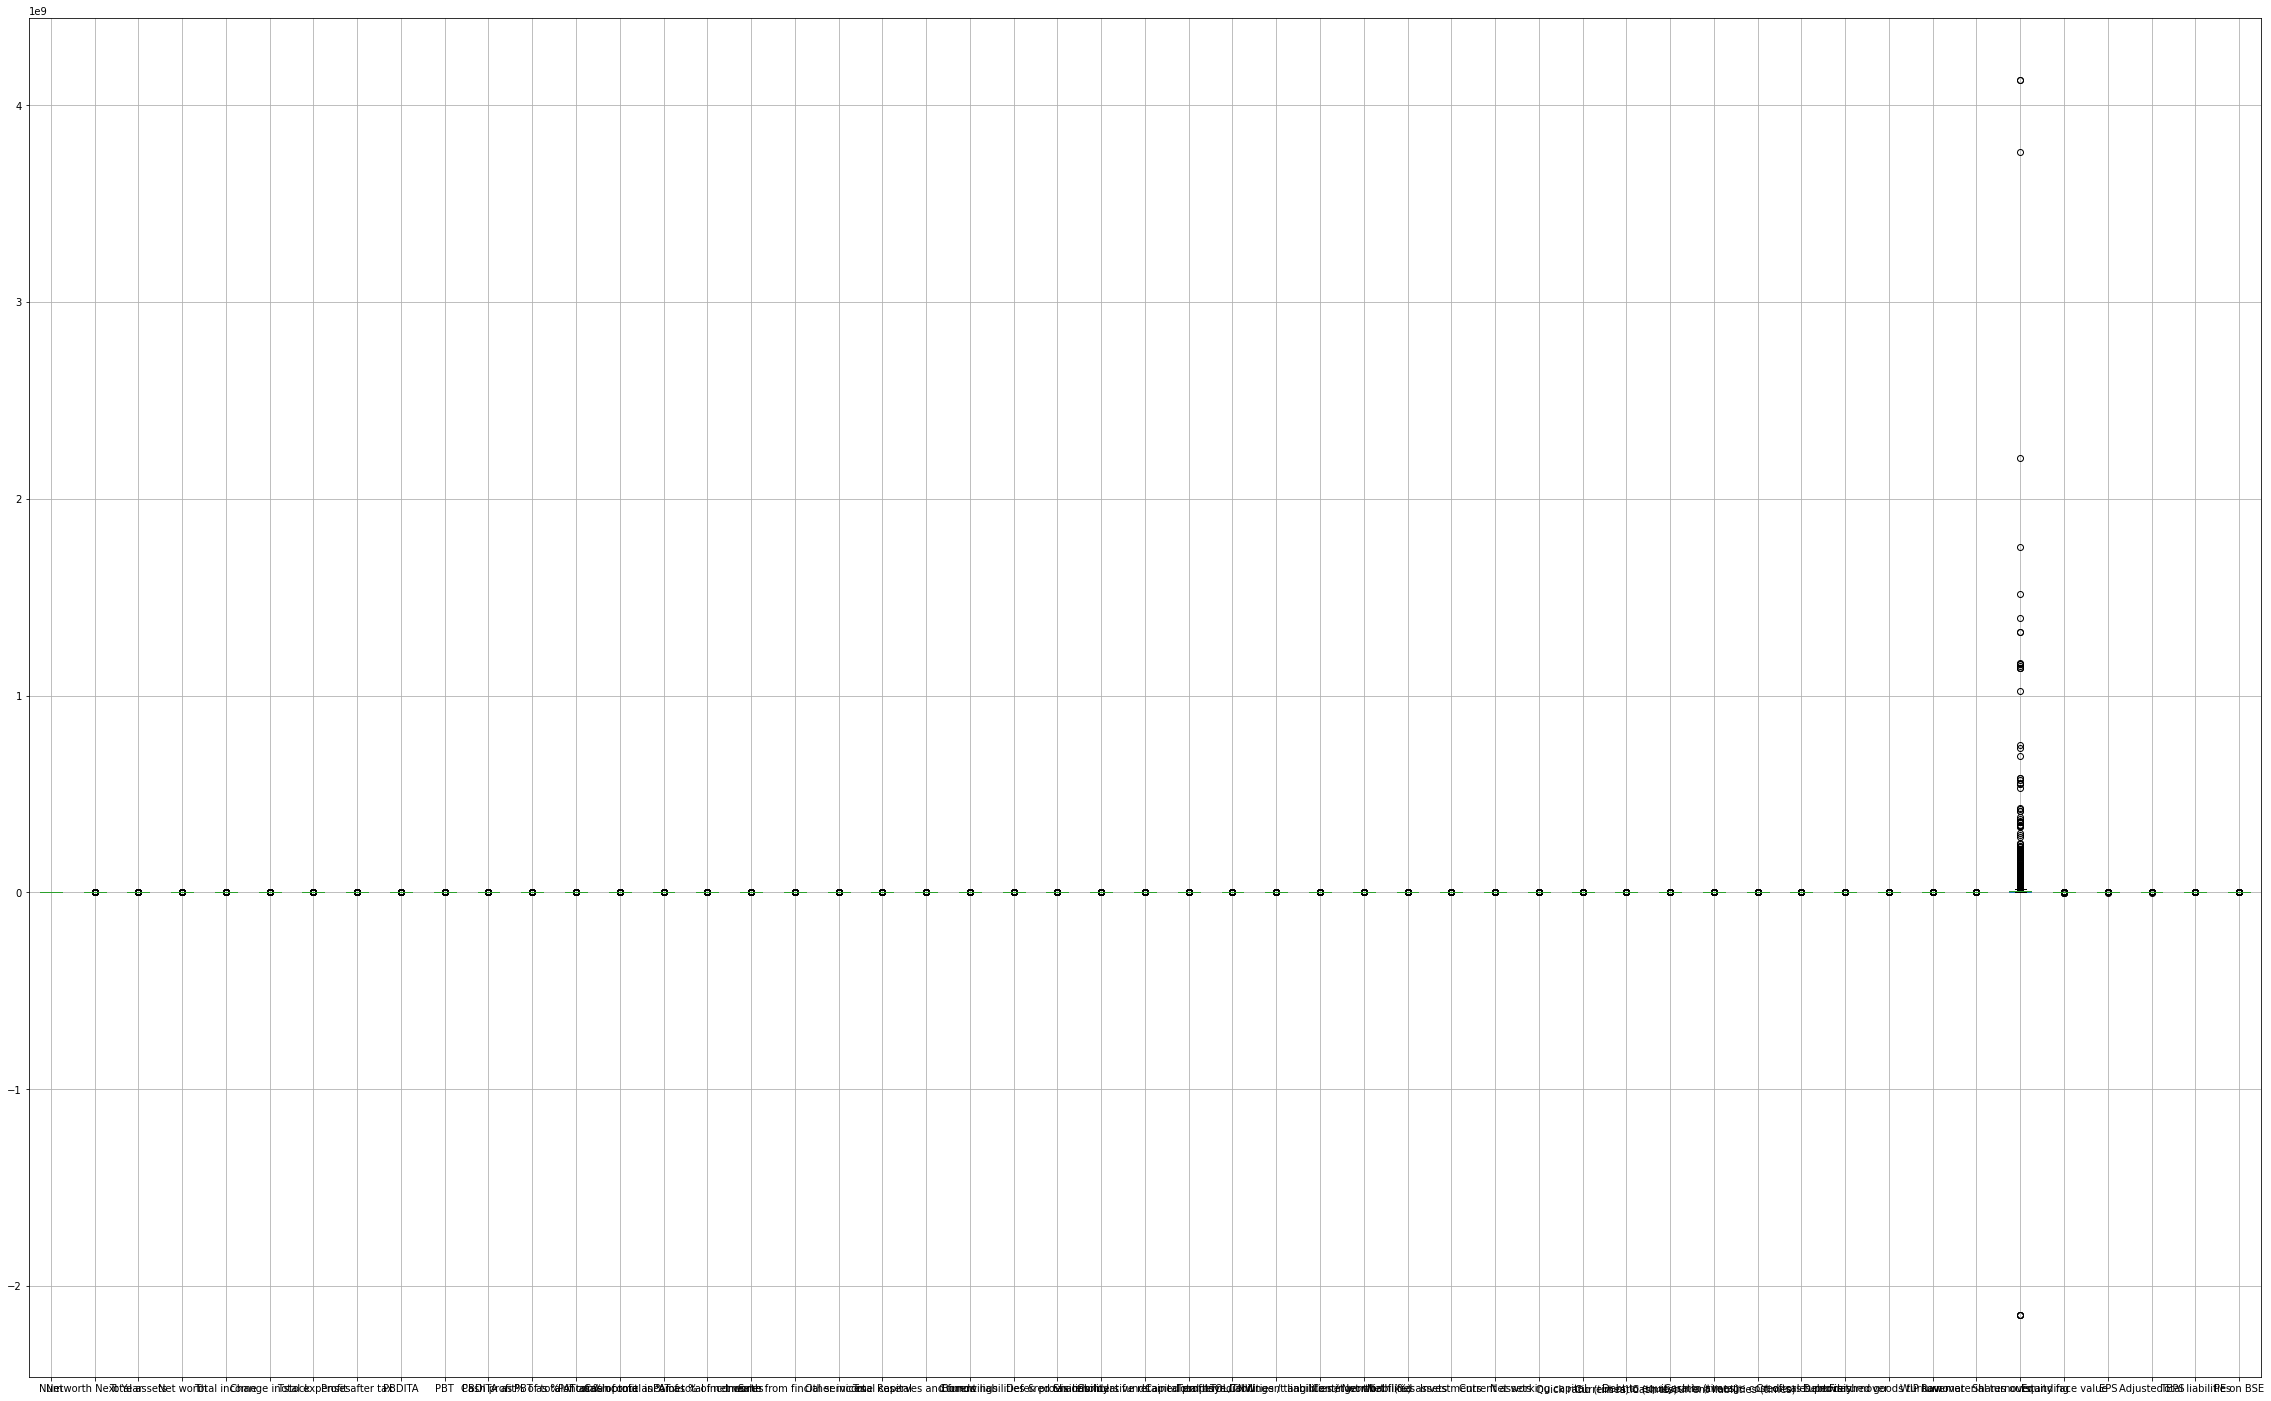

In [19]:
plt.figure(figsize=(40,25))
company_data.boxplot()

In [20]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [21]:
for column in company_data.columns:
    lr,ur=remove_outlier(company_data[column])
    company_data[column]=np.where(company_data[column]>ur,ur,company_data[column])
    company_data[column]=np.where(company_data[column]<lr,lr,company_data[column])

<AxesSubplot:>

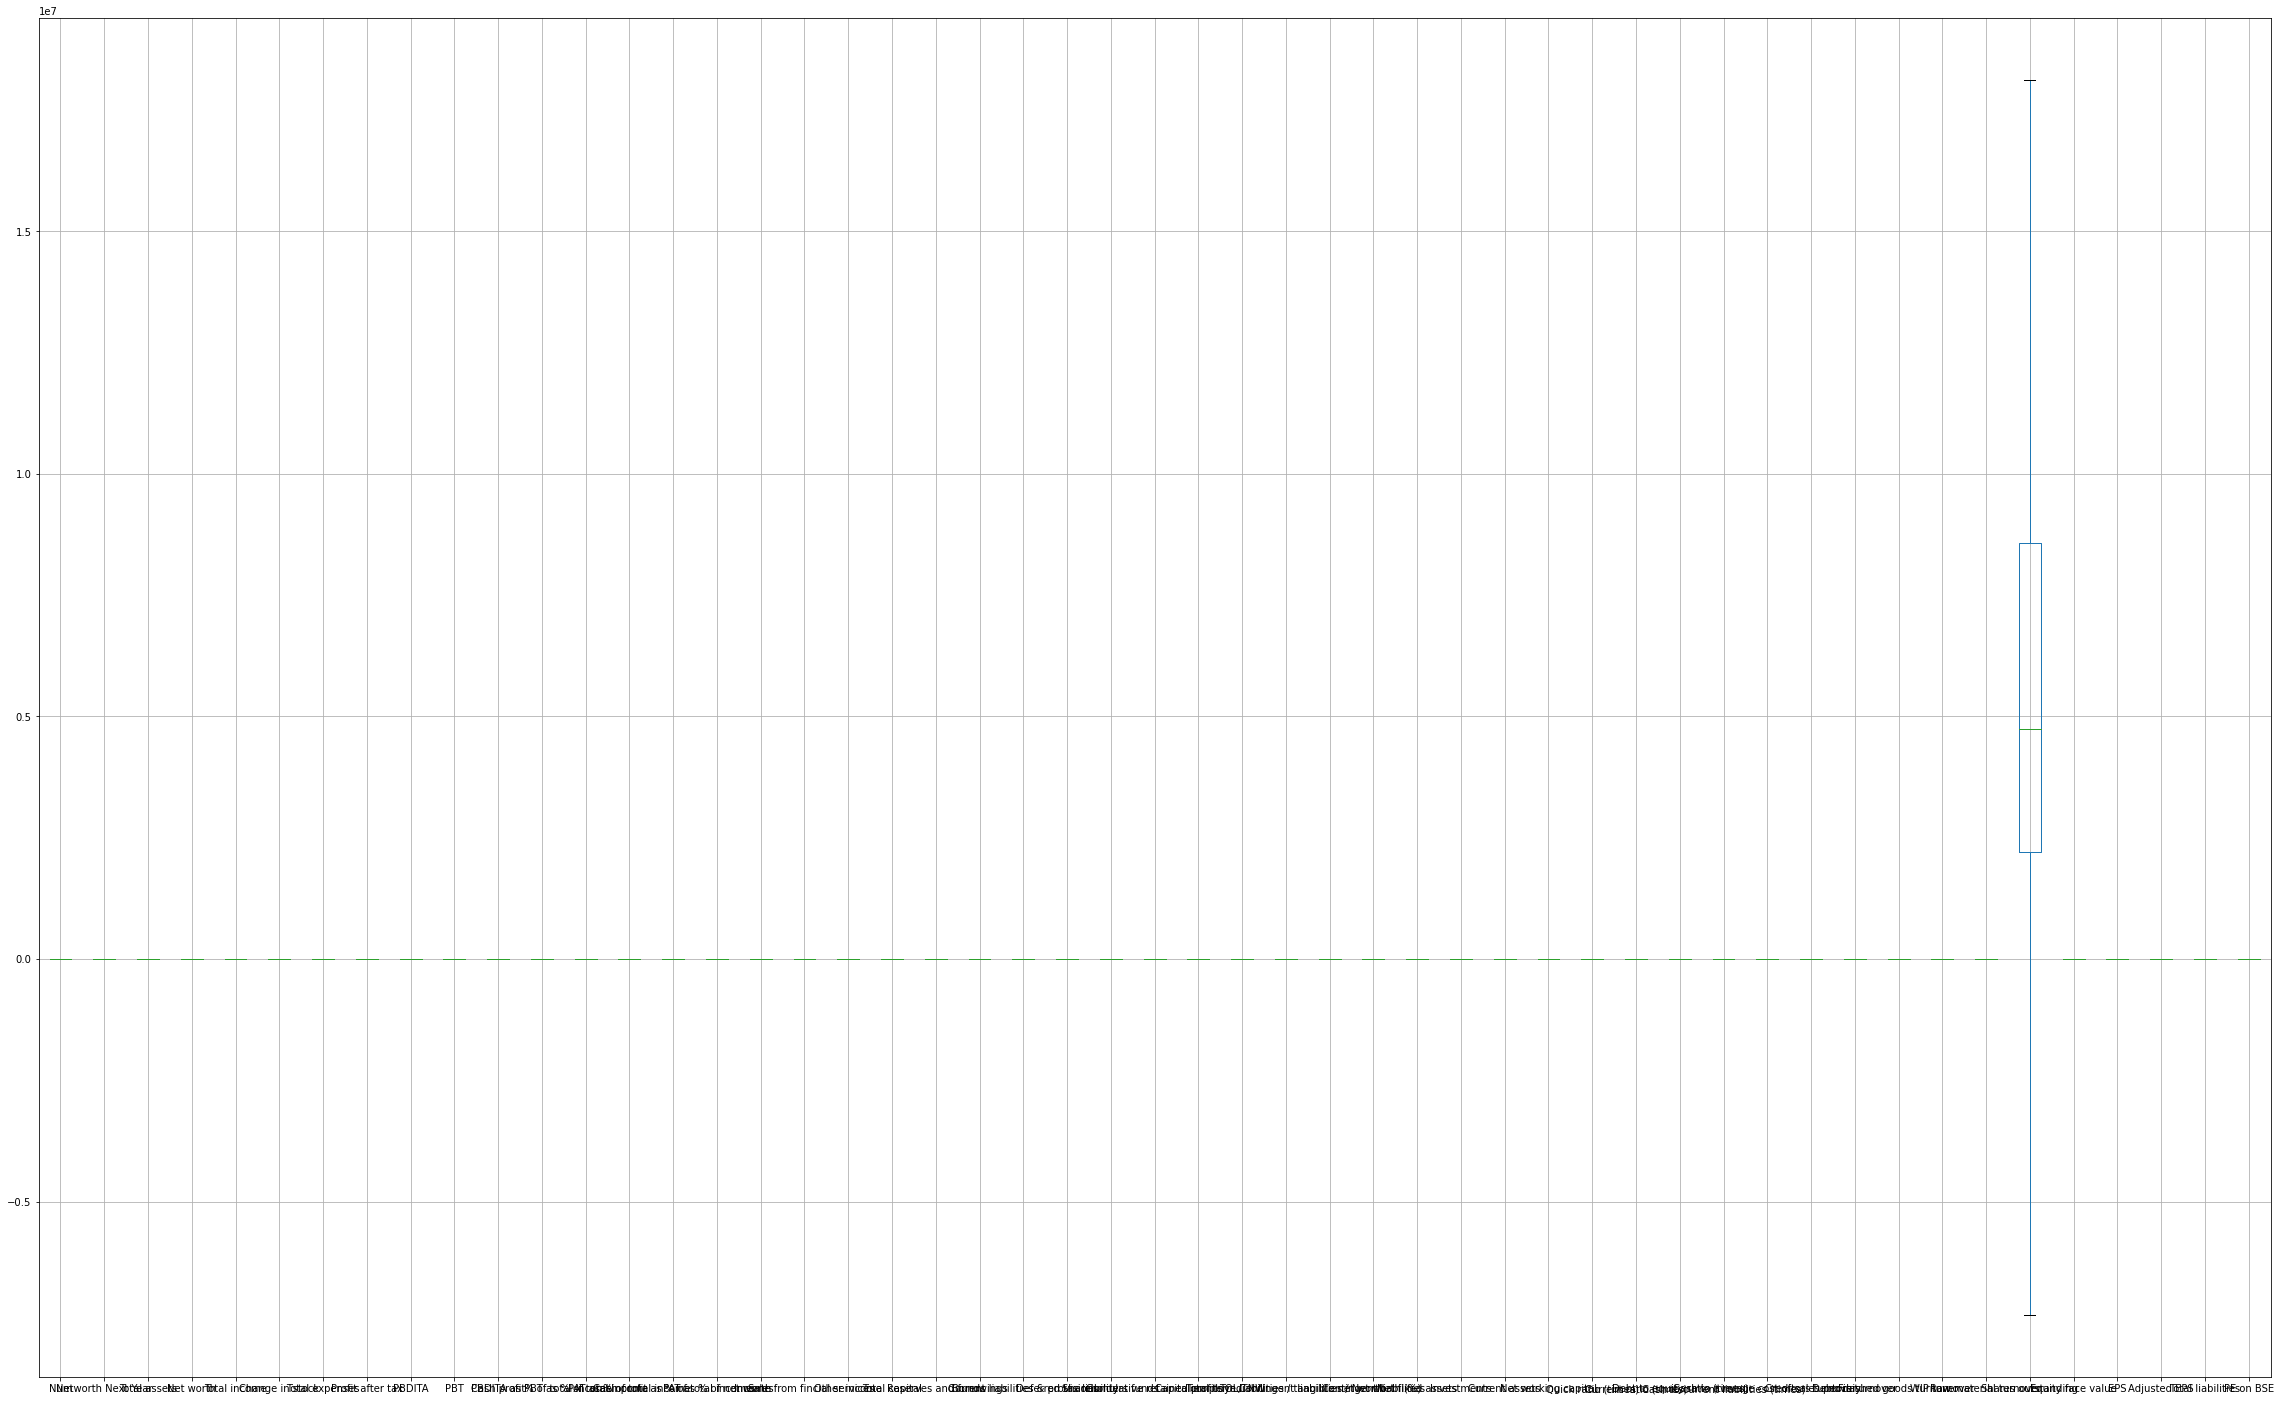

In [22]:
plt.figure(figsize=(40,25))
company_data.boxplot()

In [23]:
company_data.columns

Index(['Num', 'Networth Next Year', 'Total assets', 'Net worth',
       'Total income', 'Change in stock', 'Total expenses', 'Profit after tax',
       'PBDITA', 'PBT', 'Cash profit', 'PBDITA as % of total income',
       'PBT as % of total income', 'PAT as % of total income',
       'Cash profit as % of total income', 'PAT as % of net worth', 'Sales',
       'Income from fincial services', 'Other income', 'Total capital',
       'Reserves and funds', 'Borrowings', 'Current liabilities & provisions',
       'Deferred tax liability', 'Shareholders funds',
       'Cumulative retained profits', 'Capital employed', 'TOL/TNW',
       'Total term liabilities / tangible net worth',
       'Contingent liabilities / Net worth (%)', 'Contingent liabilities',
       'Net fixed assets', 'Investments', 'Current assets',
       'Net working capital', 'Quick ratio (times)', 'Current ratio (times)',
       'Debt to equity ratio (times)', 'Cash to current liabilities (times)',
       'Cash to average c

In [126]:
company_data_new = pd.DataFrame(company_data[['Debt to equity ratio (times)', 'TOL/TNW', 'PAT as % of net worth',
                                             'Total term liabilities / tangible net worth', 'Contingent liabilities / Net worth (%)',
                                             'PAT as % of total income', 'PBT as % of total income', 'Cash profit as % of total income',
                                             'Networth Next Year', 'Cash to average cost of sales per day']])

In [128]:
company_data_new.columns= company_data_new.columns.str.strip().str.lower()
company_data_new.columns

Index(['debt to equity ratio (times)', 'tol/tnw', 'pat as % of net worth',
       'total term liabilities / tangible net worth',
       'contingent liabilities / net worth (%)', 'pat as % of total income',
       'pbt as % of total income', 'cash profit as % of total income',
       'networth next year', 'cash to average cost of sales per day'],
      dtype='object')

In [129]:
company_data_new.columns = company_data_new.columns.str.replace(' ', '_')
company_data_new.columns

Index(['debt_to_equity_ratio_(times)', 'tol/tnw', 'pat_as_%_of_net_worth',
       'total_term_liabilities_/_tangible_net_worth',
       'contingent_liabilities_/_net_worth_(%)', 'pat_as_%_of_total_income',
       'pbt_as_%_of_total_income', 'cash_profit_as_%_of_total_income',
       'networth_next_year', 'cash_to_average_cost_of_sales_per_day'],
      dtype='object')

In [130]:
company_data_new.rename(columns={'debt_to_equity_ratio_(times)' : 'debt_to_equity_ratio', 'pat_as_%_of_net_worth': 'pat_as_percent_of_net_worth',
                                'total_term_liabilities_/_tangible_net_worth': 'total_term_liabilities/tangible_net_worth', 
                                'contingent_liabilities_/_net_worth_(%)': 'contingent_liabilities/net_worth_percent',
                                 'pat_as_%_of_total_income': 'pat_as_percent_of_total_income', 
                                 'pbt_as_%_of_total_income': 'pbt_as_percent_of_total_income', 
                                'cash_profit_as_%_of_total_income': 'cash_profit_as_percent_of_total_income'}, inplace= True)

In [131]:
company_data_new.head()

,debt_to_equity_ratio,tol/tnw,pat_as_percent_of_net_worth,total_term_liabilities/tangible_net_worth,contingent_liabilities/net_worth_percent,pat_as_percent_of_total_income,pbt_as_percent_of_total_income,cash_profit_as_percent_of_total_income,networth_next_year,cash_to_average_cost_of_sales_per_day
0,1.16,1.28,12.27,0.99,77.53125,7.28,12.10,17.82,395.3,5.41
1,0.68,1.53,0.00,0.21,47.74000,2.32,0.73,2.76,36.2,1.62
2,0.57,1.70,5.07,0.33,30.42000,1.18,3.17,2.84,84.0,26.42
3,1.93,3.69,13.17,0.22,10.79000,2.11,2.19,2.11,821.1,15.93
4,0.54,0.81,-1.48,0.44,0.00000,-0.18,-0.15,1.00,41.8,0.85


In [133]:
company_data_new['default'] = np.where(company_data_new['networth_next_year'] > 0, 0, 1)

In [134]:
company_data_new.describe().T

,count,mean,std,min,25%,50%,75%,max
debt_to_equity_ratio,4256.0,1.207677,1.249493,0.00000,0.2200,0.790,1.7500,4.04500
tol/tnw,4256.0,2.003372,1.877035,-2.74500,0.6000,1.420,2.8300,6.17500
pat_as_percent_of_net_worth,4256.0,10.597152,18.162263,-30.30375,0.0000,8.040,20.2025,50.50625
total_term_liabilities/tangible_net_worth,4256.0,0.663416,0.786524,-1.37500,0.0500,0.345,1.0000,2.42500
contingent_liabilities/net_worth_percent,4256.0,19.878289,26.795730,0.00000,0.0000,5.360,31.0125,77.53125
pat_as_percent_of_total_income,4256.0,3.270313,5.837145,-8.49000,0.3900,2.370,6.3100,15.19000
pbt_as_percent_of_total_income,4256.0,4.584075,7.856732,-11.66375,0.6100,3.340,8.7925,21.06625
cash_profit_as_percent_of_total_income,4256.0,6.515712,7.705882,-10.73500,2.0600,5.660,10.5900,23.38500
networth_next_year,4256.0,220.460221,298.594389,-486.30000,3.9750,72.100,330.8250,821.10000
cash_to_average_cost_of_sales_per_day,4256.0,15.248025,16.498206,0.00000,2.9475,8.040,21.2500,48.70375


In [135]:
company_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   debt_to_equity_ratio                       4256 non-null   float64
 1   tol/tnw                                    4256 non-null   float64
 2   pat_as_percent_of_net_worth                4256 non-null   float64
 3   total_term_liabilities/tangible_net_worth  4256 non-null   float64
 4   contingent_liabilities/net_worth_percent   4256 non-null   float64
 5   pat_as_percent_of_total_income             4256 non-null   float64
 6   pbt_as_percent_of_total_income             4256 non-null   float64
 7   cash_profit_as_percent_of_total_income     4256 non-null   float64
 8   networth_next_year                         4256 non-null   float64
 9   cash_to_average_cost_of_sales_per_day      4256 non-null   float64
 10  default                 

In [136]:
company_data_new.shape

(4256, 11)

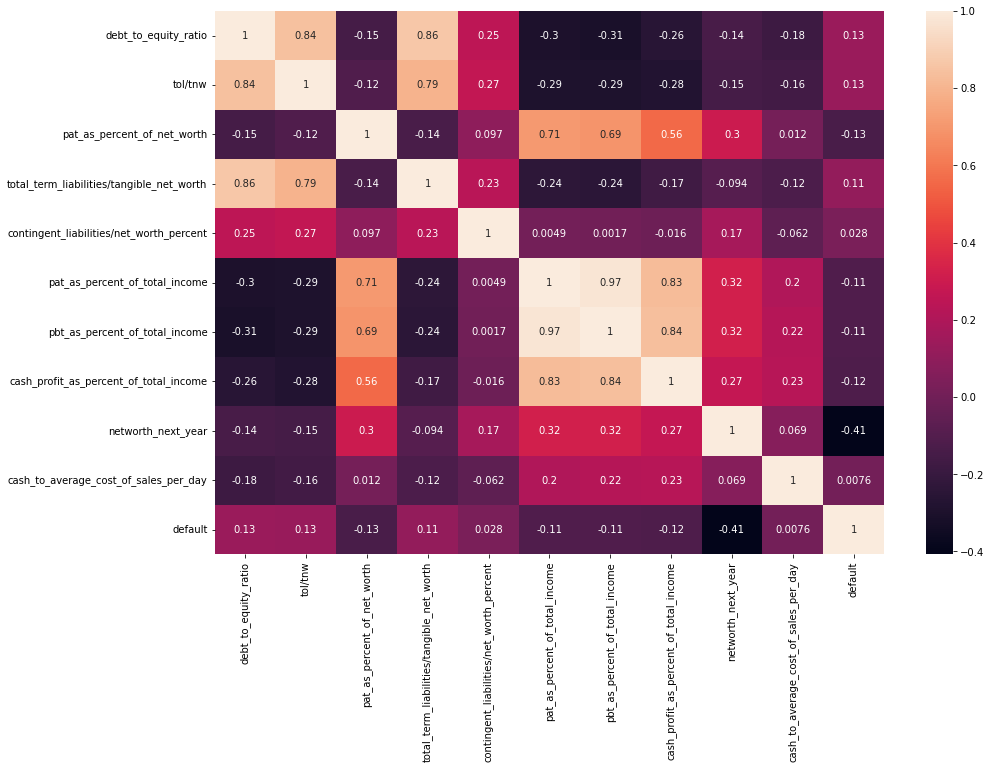

In [137]:
corr = company_data_new.corr()

plt.figure(figsize= (15,10))
sns.heatmap(corr, annot= True);

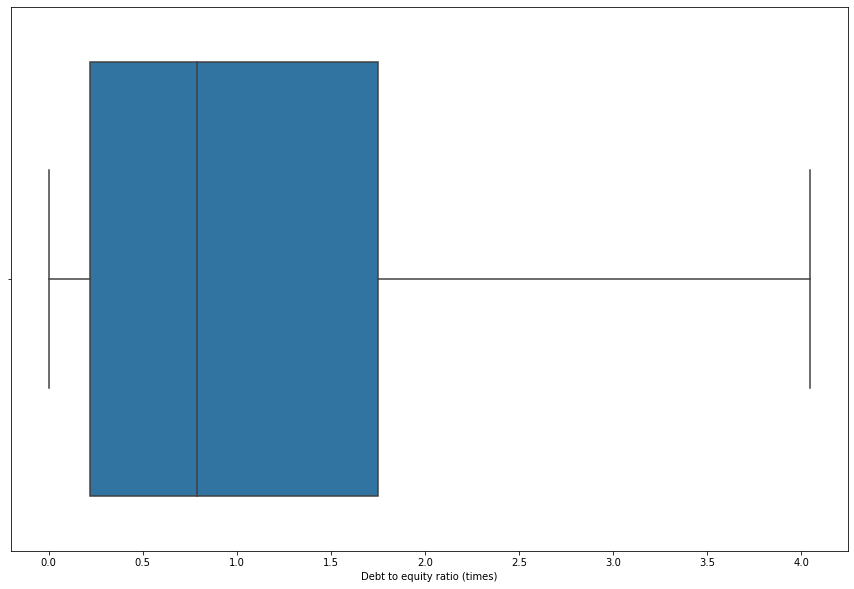

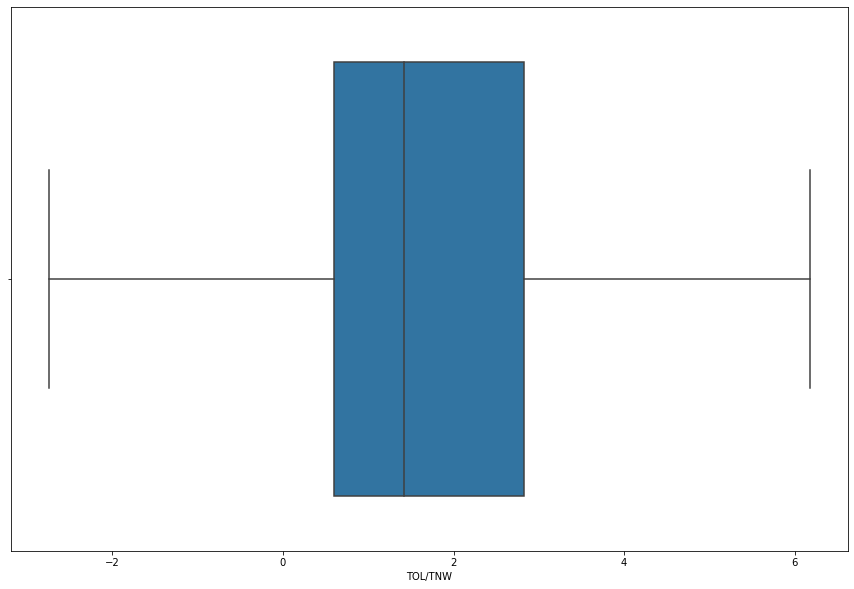

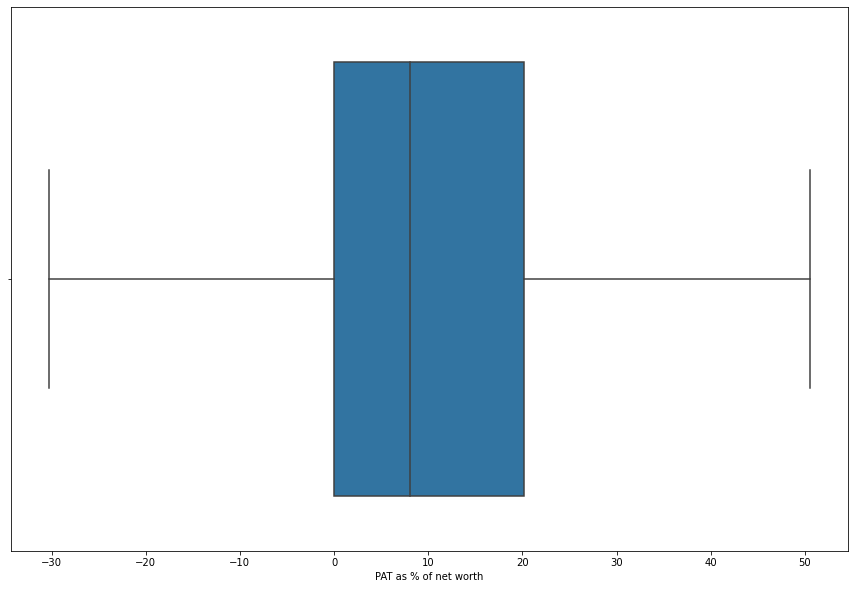

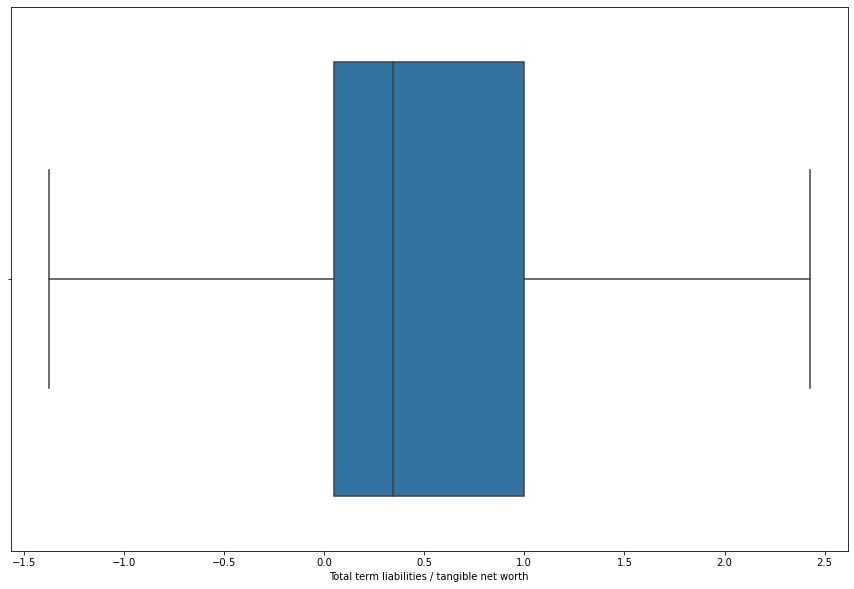

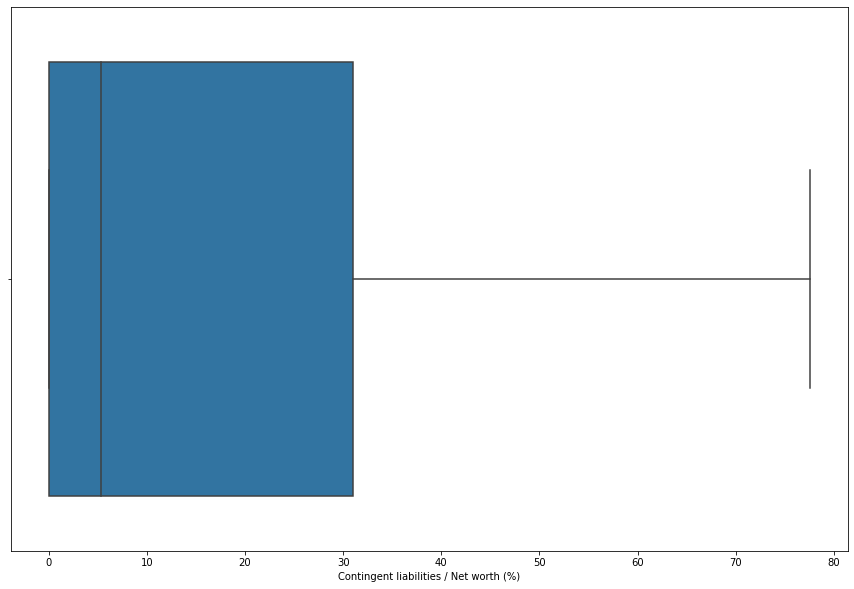

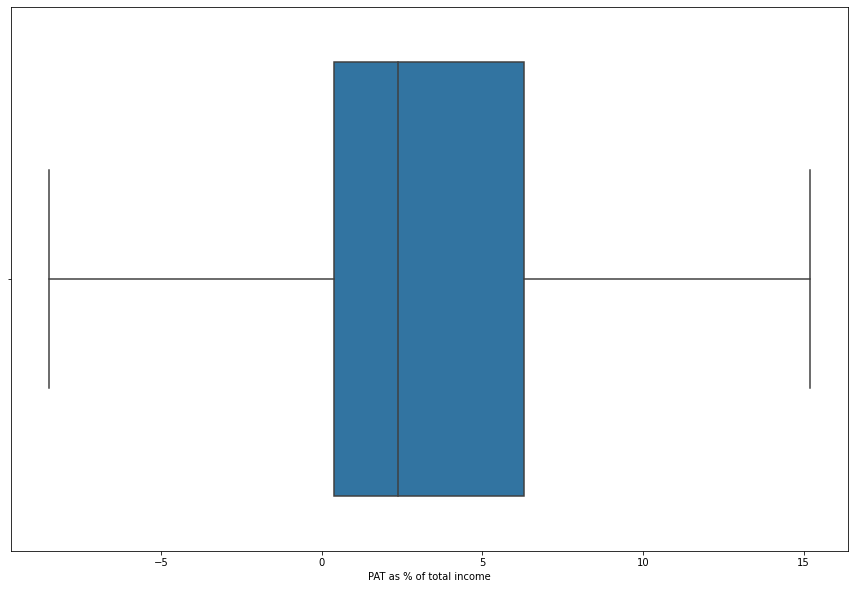

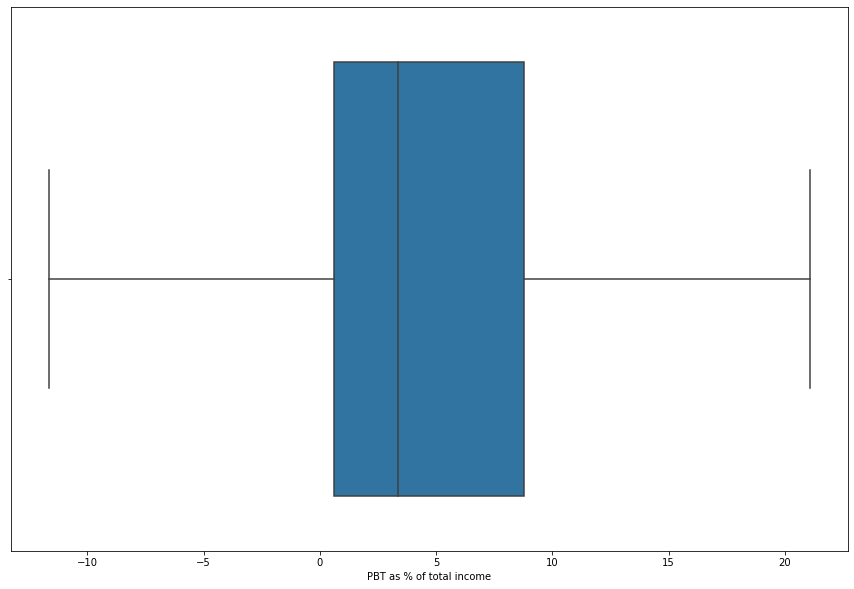

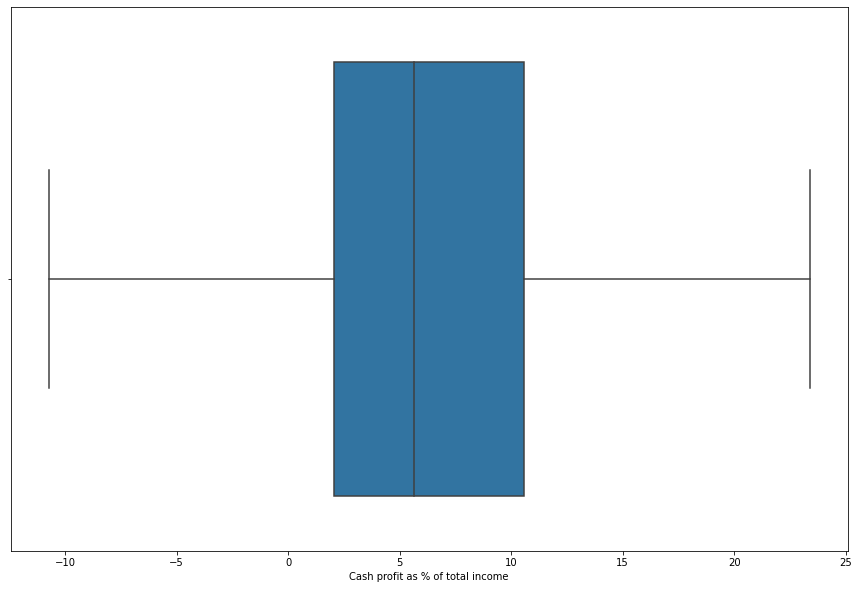

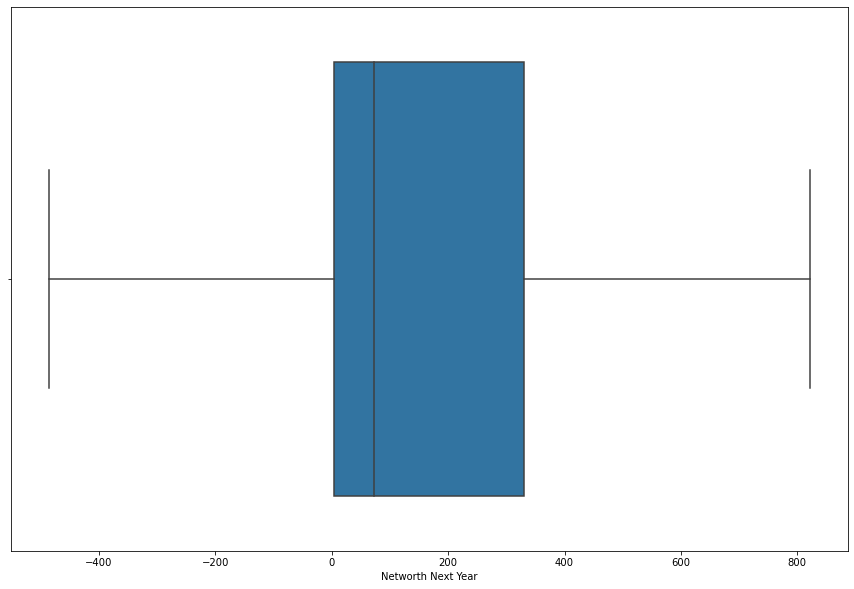

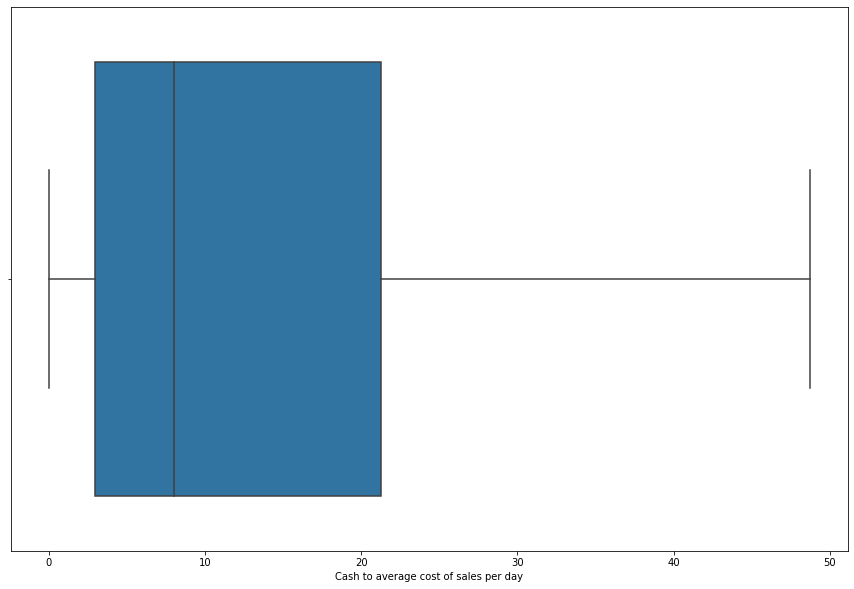

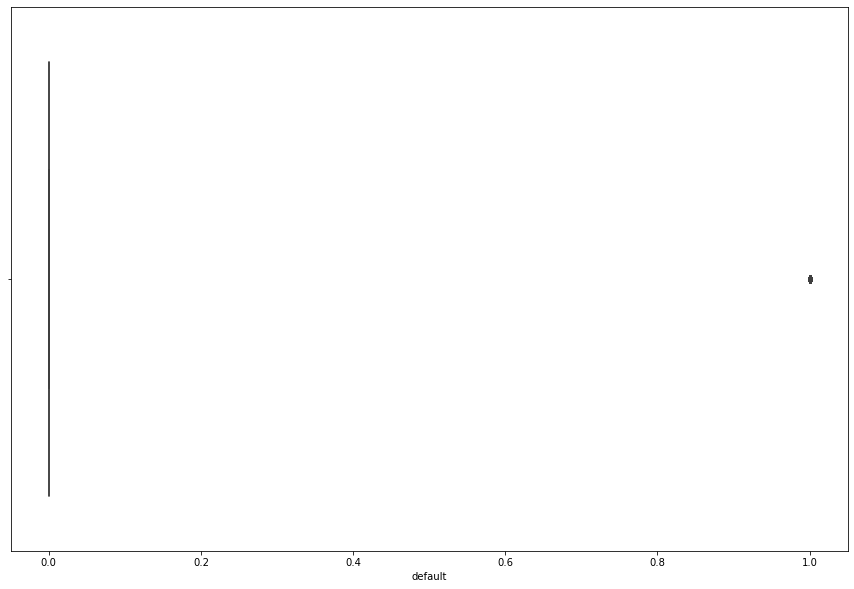

In [31]:
for col in company_data_new.columns:
    plt.figure(figsize=(15,10))
    sns.boxplot(company_data_new[col])

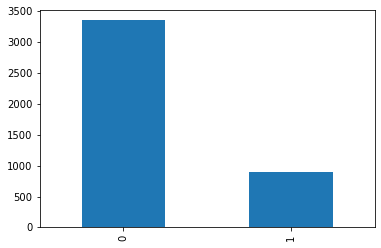

In [110]:
company_data_new['default'].value_counts().plot(kind='bar');

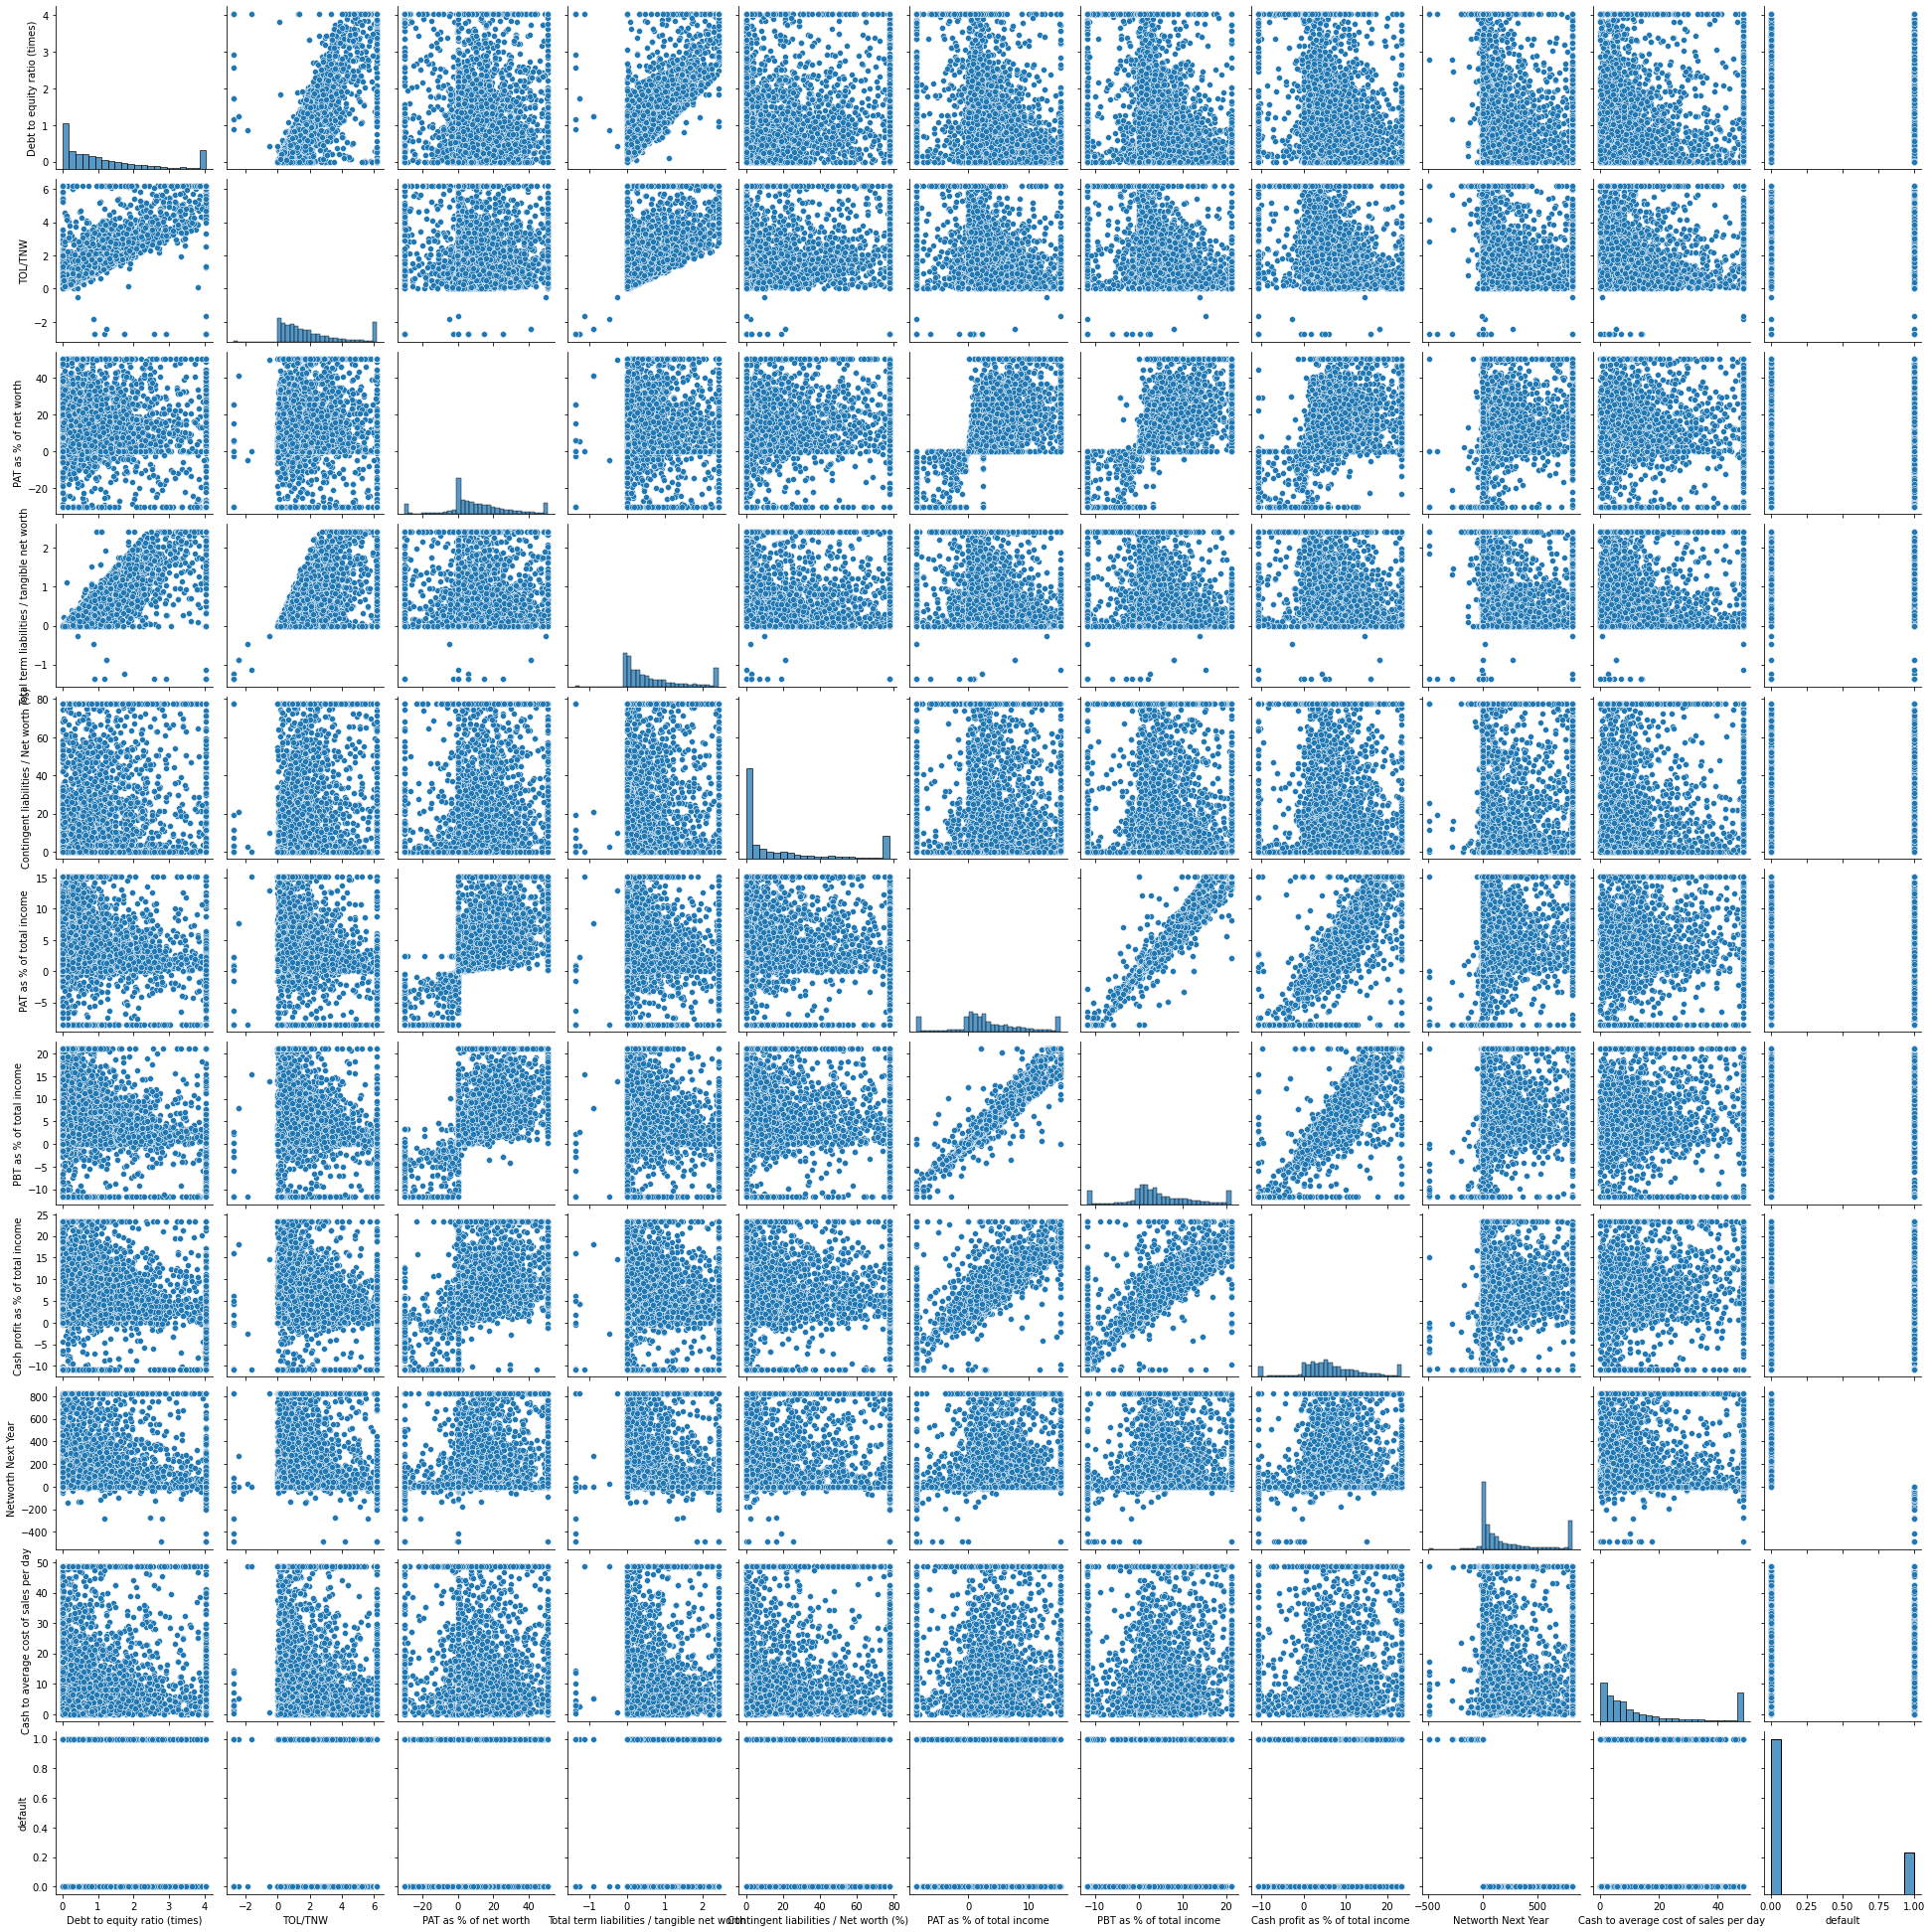

In [33]:
sns.pairplot(company_data_new);

In [138]:
from sklearn.model_selection import train_test_split

X = company_data_new.drop('default', axis =1)
y= company_data_new.pop('default')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21, stratify = y)

In [139]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=33, sampling_strategy = 0.75)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [140]:
Default_smote = pd.concat([X_res, y_res], axis = 1)

In [141]:
Default_smote.groupby('default').mean()

,debt_to_equity_ratio,tol/tnw,pat_as_percent_of_net_worth,total_term_liabilities/tangible_net_worth,contingent_liabilities/net_worth_percent,pat_as_percent_of_total_income,pbt_as_percent_of_total_income,cash_profit_as_percent_of_total_income,networth_next_year,cash_to_average_cost_of_sales_per_day
default,,,,,,,,,,
0,1.113338,1.872967,11.910144,0.615635,19.564022,3.760490,5.245537,7.202952,288.334186,15.500539
1,1.494845,2.441320,6.034011,0.810504,21.165684,1.935021,2.799669,4.641600,-11.061410,14.731811


In [143]:
train = pd.concat([X_train, y_train], axis = 1)
train_smote = pd.concat([X_res, y_res], axis = 1)
test = pd.concat([X_test, y_test], axis = 1)

### Logistic Regression

In [153]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(solver='newton-cg', max_iter=10000, n_jobs=2, verbose=True, penalty='none')
log.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.1s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [154]:
y_train_pred_log= log.predict(X_train)
y_test_pred_log = log.predict(X_test)

In [155]:
y_train_pred_prob = log.predict_proba(X_train)
pd.DataFrame(y_train_pred_prob).head(10)

,0,1
0,1.000000,2.560289e-123
1,0.082336,9.176635e-01
2,1.000000,9.063991e-64
3,0.102805,8.971954e-01
4,1.000000,1.652518e-153
5,0.323278,6.767219e-01
6,1.000000,2.484806e-09
7,1.000000,4.049801e-240
8,1.000000,1.615979e-239
9,1.000000,4.768246e-47


In [156]:
y_test_pred_prob = log.predict_proba(X_test)
pd.DataFrame(y_test_pred_prob).head(10)

,0,1
0,1.000000,6.674369e-42
1,0.039299,9.607007e-01
2,1.000000,3.256266e-38
3,1.000000,1.320669e-57
4,1.000000,2.665857e-12
5,0.142929,8.570712e-01
6,1.000000,3.527971e-59
7,0.995904,4.095829e-03
8,1.000000,1.042540e-199
9,1.000000,1.295168e-194


#### Acccuracy

In [157]:
#training data
log.score(X_train, y_train)

0.9741524001342733

In [158]:
#test data
log.score(X_test, y_test)

0.9819890368050117

In [159]:
from sklearn.metrics import classification_report, auc, roc_auc_score, roc_curve, confusion_matrix

#### Classification report

In [162]:
#Training data
print(classification_report(y_train, y_train_pred_log))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2346
           1       0.92      0.97      0.94       633

    accuracy                           0.97      2979
   macro avg       0.95      0.97      0.96      2979
weighted avg       0.98      0.97      0.97      2979



In [161]:
#Test data
print(classification_report(y_test, y_test_pred_log))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1006
           1       0.94      0.98      0.96       271

    accuracy                           0.98      1277
   macro avg       0.97      0.98      0.97      1277
weighted avg       0.98      0.98      0.98      1277



#### Confusion Matrix

In [164]:
#train data
cm_train_log = confusion_matrix(y_train, y_train_pred_log, labels=[0,1])

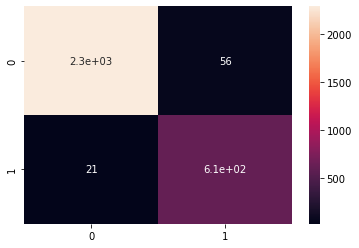

In [165]:
sns.heatmap(cm_train_log, annot=True);

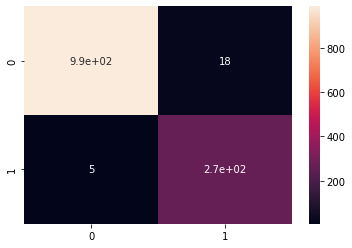

In [166]:
#test data

cm_test_log = confusion_matrix(y_test, y_test_pred_log, labels=[0,1])
sns.heatmap(cm_test_log, annot=True);

#### Auc & Roc

AUC : 0.995


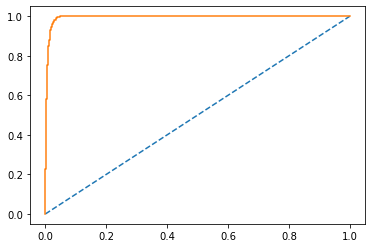

In [167]:
# train data

probs = log.predict_proba(X_train)

probs = probs[:,1]

auc = roc_auc_score(y_train, probs)

print('AUC : %.3f'%auc)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0,1], [0,1], linestyle = '--')

plt.plot(train_fpr, train_tpr);

AUC : 0.996


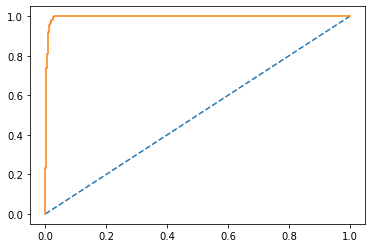

In [168]:
#test data

probs = log.predict_proba(X_test)

probs = probs[:,1]

auc = roc_auc_score(y_test, probs)

print('AUC : %.3f'%auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle = '--')

plt.plot(test_fpr, test_tpr);

### Random Forest Classifier

In [185]:
from sklearn.ensemble import RandomForestClassifier

rfcl = RandomForestClassifier(n_estimators=100, oob_score=True, max_depth=4, 
                              max_features=5, min_samples_leaf= 10, min_samples_split=5, random_state=1)

In [186]:
rfcl = rfcl.fit(X_train, y_train)

In [187]:
rfcl.oob_score_

1.0

In [188]:
rfcl.feature_importances_

array([4.46397906e-03, 6.03736387e-03, 1.47400683e-02, 5.87759147e-04,
       8.55247941e-04, 3.35610826e-03, 4.34862492e-03, 3.29772842e-03,
       9.61808612e-01, 5.04508477e-04])

In [190]:
print(pd.DataFrame(rfcl.feature_importances_, columns = ["Importance"], index = ['debt_to_equity_ratio', 'tol/tnw', 'pat_as_percent_of_net_worth',
       'total_term_liabilities/tangible_net_worth',
       'contingent_liabilities/net_worth_percent',
       'pat_as_percent_of_total_income', 'pbt_as_percent_of_total_income',
       'cash_profit_as_percent_of_total_income', 'networth_next_year',
       'cash_to_average_cost_of_sales_per_day']))

                                           Importance
debt_to_equity_ratio                         0.004464
tol/tnw                                      0.006037
pat_as_percent_of_net_worth                  0.014740
total_term_liabilities/tangible_net_worth    0.000588
contingent_liabilities/net_worth_percent     0.000855
pat_as_percent_of_total_income               0.003356
pbt_as_percent_of_total_income               0.004349
cash_profit_as_percent_of_total_income       0.003298
networth_next_year                           0.961809
cash_to_average_cost_of_sales_per_day        0.000505


In [192]:
y_train_predict_rfcl = rfcl.predict(X_train)
y_test_predict_rfcl = rfcl.predict(X_test)

#### Accuracy

In [193]:
#train data
rfcl.score(X_train, y_train)

1.0

In [194]:
#test data
rfcl.score(X_test, y_test)

1.0

#### Classification report

In [195]:
# Train data

print(classification_report(y_train, y_train_predict_rfcl))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2346
           1       1.00      1.00      1.00       633

    accuracy                           1.00      2979
   macro avg       1.00      1.00      1.00      2979
weighted avg       1.00      1.00      1.00      2979



In [196]:
#Test data

print(classification_report(y_test, y_test_predict_rfcl))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1006
           1       1.00      1.00      1.00       271

    accuracy                           1.00      1277
   macro avg       1.00      1.00      1.00      1277
weighted avg       1.00      1.00      1.00      1277



#### Confusion Matrix

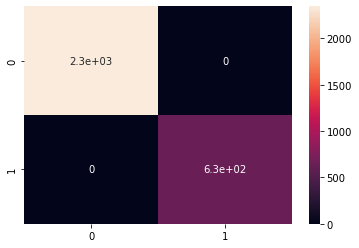

In [197]:
# Train data

cm_train_rfcl = confusion_matrix(y_train, y_train_predict_rfcl, labels=[0,1])
sns.heatmap(cm_train_rfcl, annot=True);

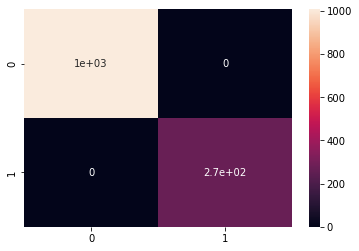

In [199]:
# Test data

cm_test_rfcl = confusion_matrix(y_test, y_test_predict_rfcl, labels=[0,1])
sns.heatmap(cm_test_rfcl, annot=True);

#### Auc & Roc

AUC : 1.000


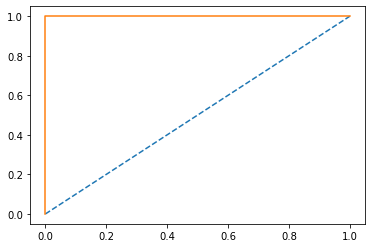

In [200]:
# train data

probs = rfcl.predict_proba(X_train)

probs = probs[:,1]

auc = roc_auc_score(y_train, probs)

print('AUC : %.3f'%auc)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0,1], [0,1], linestyle = '--')

plt.plot(train_fpr, train_tpr);

AUC : 1.000


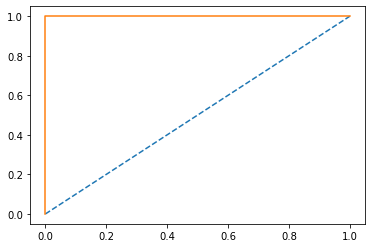

In [201]:
#test data

probs = rfcl.predict_proba(X_test)

probs = probs[:,1]

auc = roc_auc_score(y_test, probs)

print('AUC : %.3f'%auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle = '--')

plt.plot(test_fpr, test_tpr);